<a href="https://colab.research.google.com/github/OshithaDilshan/ai-in-healthcare-portfolio/blob/week05/week05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

In [27]:
data = load_breast_cancer()

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)

column_names = ['id','diagnosis', 'radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compacrness_mean','concavity_mean','concave_points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave_points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave_points_worst','symmetry_worst','frctal_dimensions_worst']

df.columns = column_names

df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

df = df.drop('id', axis=1)

print("Dataset Loaded Successfully!")
print(f"Shape: {df.shape} (Rowns, Columns)")
display(df.head())

Dataset Loaded Successfully!
Shape: (569, 31) (Rowns, Columns)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compacrness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,frctal_dimensions_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data scaled and ready")

Data scaled and ready


In [29]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

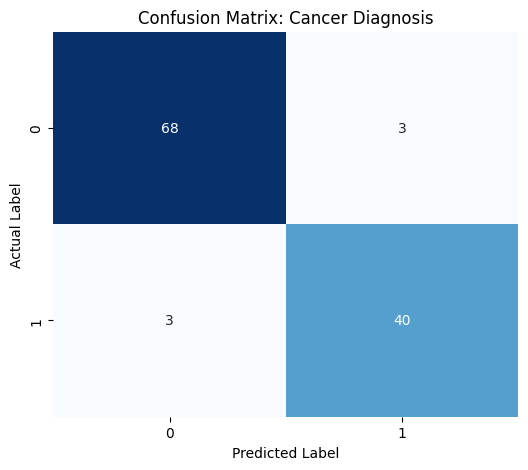

In [30]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix: Cancer Diagnosis')
plt.show()

In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       0.96      0.96      0.96        71
      benign       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



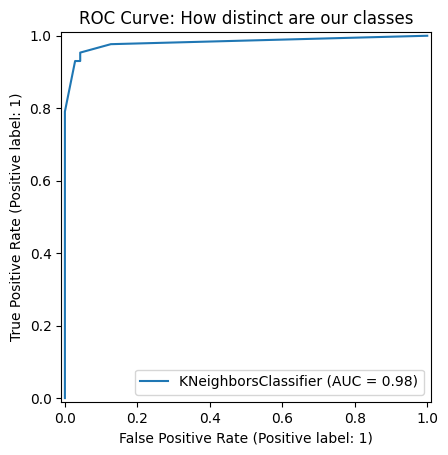

In [32]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(model, X_test_scaled, y_test)
plt.title("ROC Curve: How distinct are our classes")
plt.show()

In [33]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train_scaled, y_train, cv=10, scoring='accuracy')

print(f"Accuracy Scores for each run: {scores}")
print(f"\nAverage Accuracy: {scores.mean()*100:.2f}%")
print(f"Standard Deviation: +/- {scores.std()*100:.2f}%")

Accuracy Scores for each run: [1.         0.95652174 0.97826087 0.95652174 0.97826087 1.
 0.97777778 0.97777778 0.95555556 0.88888889]

Average Accuracy: 96.70%
Standard Deviation: +/- 3.02%


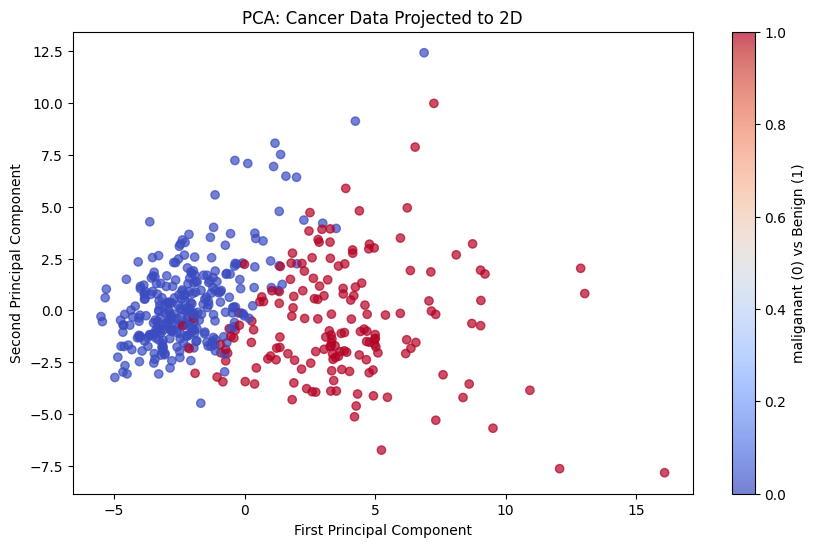

In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='coolwarm', alpha=0.7)
plt.title('PCA: Cancer Data Projected to 2D')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(label='maliganant (0) vs Benign (1)')
plt.show()

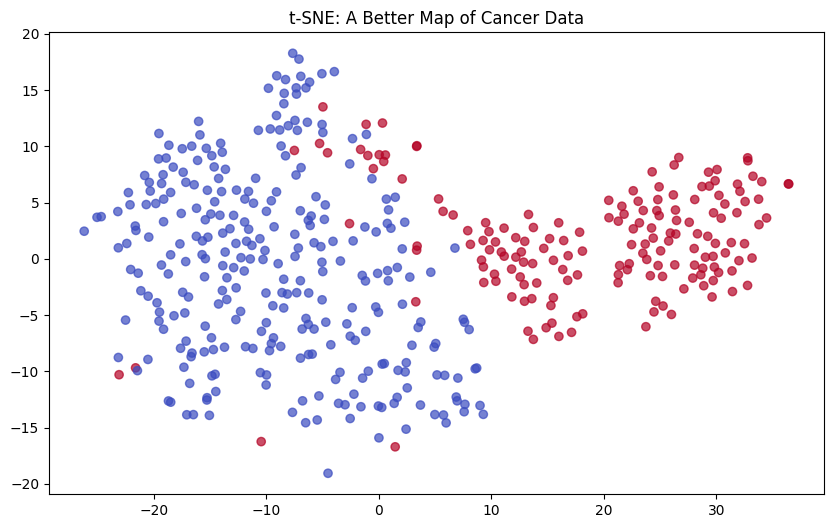

In [35]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, cmap='coolwarm', alpha=0.7)
plt.title('t-SNE: A Better Map of Cancer Data')
plt.show()

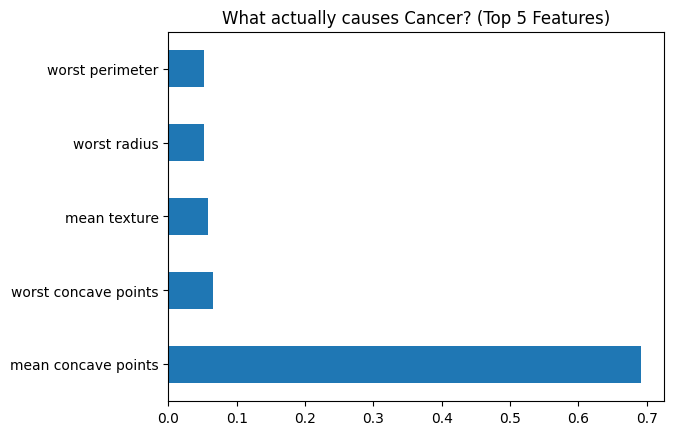

In [36]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train_scaled, y_train)

feature_importance = pd.Series(tree.feature_importances_, index=data.feature_names)
feature_importance.nlargest(5).plot(kind='barh')
plt.title("What actually causes Cancer? (Top 5 Features)")
plt.show()